<h2>Classifying Iris Species</h2>

<p>Import core python modules</p>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import Dataset from ScikitLearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
#Print keys and values of Iris dataset
print("Keys of iris_dataset : \n{}".format(iris_dataset.keys()))

Keys of iris_dataset : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
#Print Description (first part)
print(iris_dataset['DESCR'][:193] + "\n")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att



In [5]:
#Analyse target_names (key)
print("Target names {}".format(iris_dataset['target_names']))

Target names ['setosa' 'versicolor' 'virginica']


In [6]:
#Analyse feature_names
print("Feature names {}".format(iris_dataset['feature_names']))

Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#Check data
print("Type of data {}".format(type(iris_dataset['data'])))

Type of data <class 'numpy.ndarray'>


It is apparent that data is a numpy array

In [8]:
#Shape of data
print("Type of data {}".format(iris_dataset['data'].shape))

Type of data (150, 4)


In [9]:
#Analysing target (y)
print("Type of target {}".format(type(iris_dataset['target'])))

Type of target <class 'numpy.ndarray'>


In [10]:
#Shape of target
print("Type of target {}".format(iris_dataset['target'].shape))

Type of target (150,)


<h3>Creating training and test set</h3>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0
)

In [14]:
#Analyse X train and Y train
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))

X_train shape:(112, 4)
y_train shape:(112,)


In [15]:
#Analyse Xtest and Ytest
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_test shape:(38, 4)
y_test shape:(38,)


<h3>Create Pair Plots</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5e64af60>,
      dtype=object)

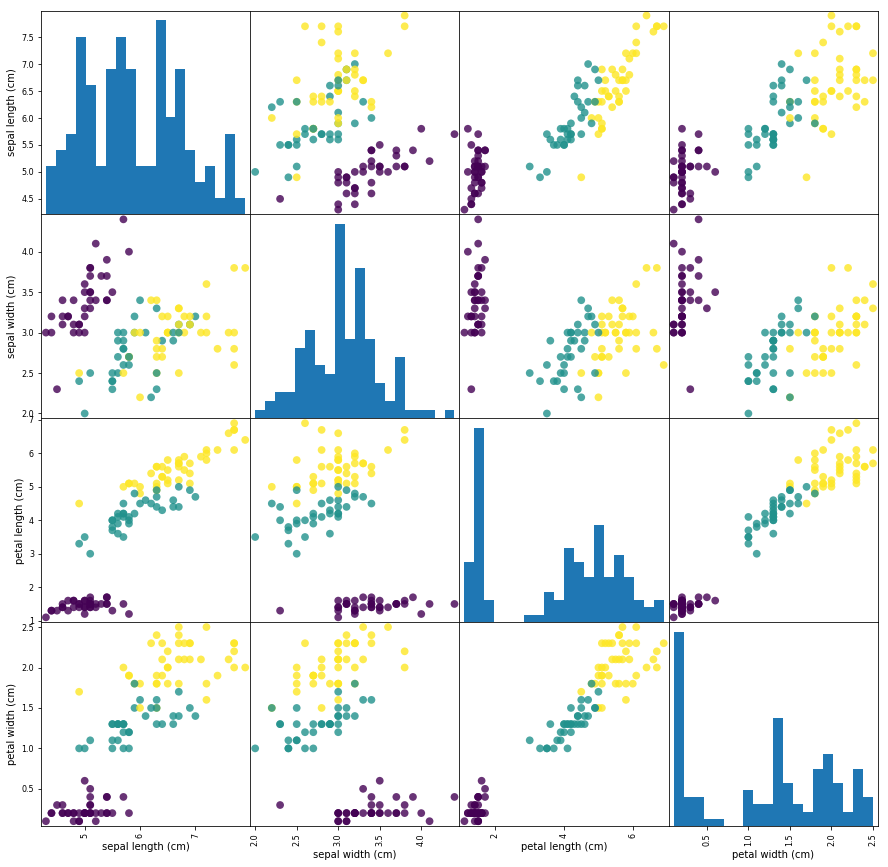

In [19]:
#create data frames from data in X_train
#lable the columns using the strings in iris_dataset.feature_names 
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
#create a scatter matrix from the dataframe, color by y_train 
pd.plotting.scatter_matrix(
    iris_dataframe,
    c = y_train,
    figsize = (15, 15),
    marker = 'o',
    hist_kwds = {'bins':20},
    s = 60,
    alpha = .8
)

<h3>Building K-Neareset Neighbours classifier</h3>

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

In [22]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [23]:
#Build model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<h4>Make Prediction</h4>

In [24]:
#Unseen features
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new shape {}".format(X_new.shape))

X_new shape (1, 4)


In [27]:
#Make prediction
prediction = knn.predict(X_new)
print("Prediction {}".format(prediction))

Prediction [0]


In [28]:
print("Predicted target name :{}".format(iris_dataset['target_names'][prediction]))

Predicted target name :['setosa']


<h3>Evaluating Model</h3>

In [29]:
y_pred = knn.predict(X_test)
print("Test set predictions :\n {}".format(y_pred))

Test set predictions :
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("Test set score : {:.2f}".format(np.mean(y_pred == y_test)))

Test set score : 0.97


<h3>Training and Evaluation in one line</h3>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0
)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test set score : {:2f}".format(knn.score(X_test, y_test)))

Test set score : 0.973684
